# CNN_CatDog

Reference: Loy, James. "Neural Network Projects With Python". Packt. Feb 2019.

In [0]:
import os
import zipfile
import random
from matplotlib import pyplot as plt

In [0]:
# !pip install import-ipynb
# import import_ipynb
# # Install the PyDrive wrapper & import libraries.
# # This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # Copy the link and remove the front part of the link (i.e. https://drive.google.com/open?id=) to get the file ID.
# your_module = drive.CreateFile({'id':'1OxDQg--aUXIXXkTYQ5KjhiTdV2aGBacm'})
# your_module.GetContentFile('utils.ipynb')
# import utils

In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/N/Projects/Image Classification/ds.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [0]:
_, _, cat_images = next(os.walk('ds/PetImages/Cat')) # cat_images return a list of cat image names

In [0]:
# cat_images

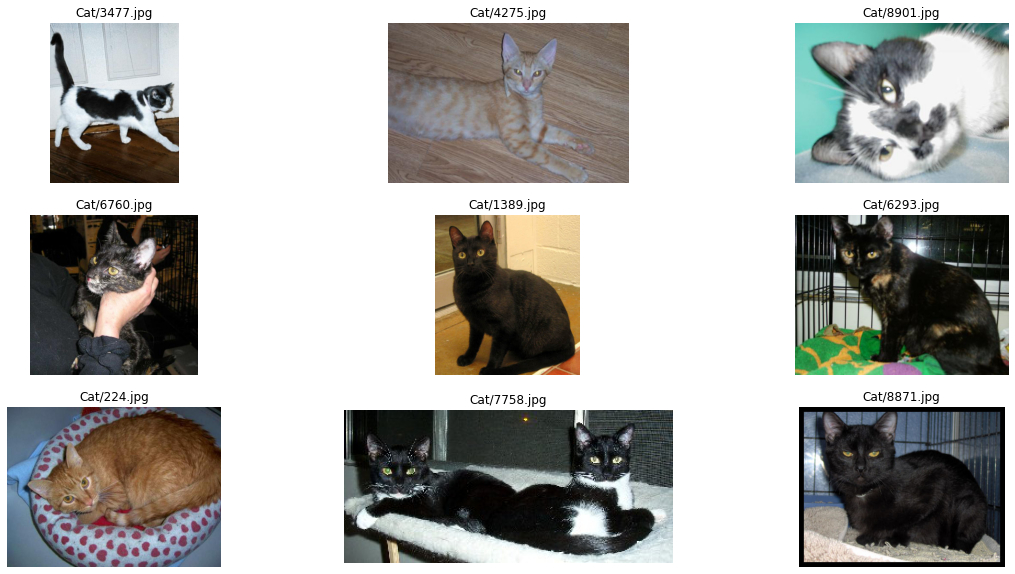

In [0]:
# Prepare a 3x3 plot (total of 9 images)
fig, ax = plt.subplots(3,3, figsize=(20,10))

# Randomly select and plot an image
for idx, img in enumerate(random.sample(cat_images, 9)):
    img_read = plt.imread('ds/PetImages/Cat/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Cat/'+img)

plt.show()

In [0]:
_, _, dog_images = next(os.walk('ds/PetImages/Dog/')) # dog_images return a list of dog image names

In [0]:
# dog_images

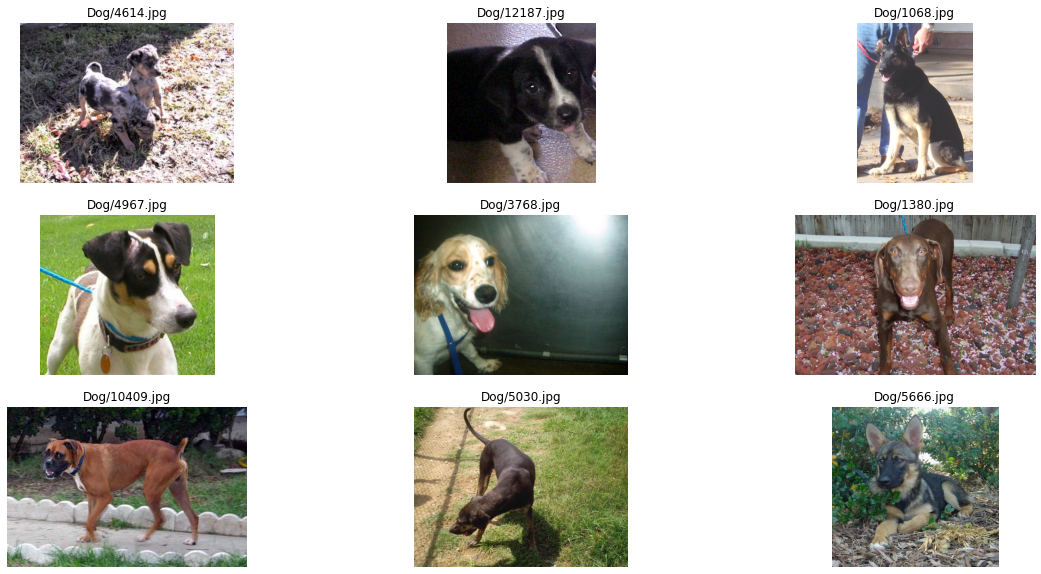

In [0]:
# Prepare a 3x3 plot (total of 9 images)
fig, ax = plt.subplots(3,3, figsize=(20,10))

# Randomly select and plot an image
for idx, img in enumerate(random.sample(dog_images, 9)):
    img_read = plt.imread('ds/PetImages/Dog/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Dog/'+img)

plt.show()

In [0]:
# from utils import train_test_split

In [0]:
!pip install piexif
import os
import random
import shutil
import piexif

In [0]:
def train_test_split(src_folder, train_size = 0.8):
	# Make sure we remove any existing folders and start from a clean slate
	shutil.rmtree(src_folder+'Train/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Train/Dog/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Cat/', ignore_errors=True)
	shutil.rmtree(src_folder+'Test/Dog/', ignore_errors=True)

	# Now, create new empty train and test folders
	os.makedirs(src_folder+'Train/Cat/')
	os.makedirs(src_folder+'Train/Dog/')
	os.makedirs(src_folder+'Test/Cat/')
	os.makedirs(src_folder+'Test/Dog/')

	# Get the number of cats and dogs images
	_, _, cat_images = next(os.walk(src_folder+'Cat/'))
	files_to_be_removed = ['Thumbs.db', '666.jpg', '835.jpg']
	for file in files_to_be_removed:
		cat_images.remove(file)
	num_cat_images = len(cat_images)
	num_cat_images_train = int(train_size * num_cat_images)
	num_cat_images_test = num_cat_images - num_cat_images_train

	_, _, dog_images = next(os.walk(src_folder+'Dog/'))
	files_to_be_removed = ['Thumbs.db', '11702.jpg']
	for file in files_to_be_removed:
		dog_images.remove(file)
	num_dog_images = len(dog_images)
	num_dog_images_train = int(train_size * num_dog_images)
	num_dog_images_test = num_dog_images - num_dog_images_train

	# Randomly assign images to train and test
	cat_train_images = random.sample(cat_images, num_cat_images_train)
	for img in cat_train_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Train/Cat/')
	cat_test_images = [img for img in cat_images if img not in cat_train_images]
	for img in cat_test_images:
		shutil.copy(src=src_folder+'Cat/'+img, dst=src_folder+'Test/Cat/')

	dog_train_images = random.sample(dog_images, num_dog_images_train)
	for img in dog_train_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Train/Dog/')
	dog_test_images = [img for img in dog_images if img not in dog_train_images]
	for img in dog_test_images:
		shutil.copy(src=src_folder+'Dog/'+img, dst=src_folder+'Test/Dog/')

	# remove corrupted exif data from the dataset
	remove_exif_data(src_folder+'Train/')
	remove_exif_data(src_folder+'Test/')

# helper function to remove corrupt exif data from Microsoft's dataset
def remove_exif_data(src_folder):
	_, _, cat_images = next(os.walk(src_folder+'Cat/'))
	for img in cat_images:
		try:
			piexif.remove(src_folder+'Cat/'+img)
		except:
			pass

	_, _, dog_images = next(os.walk(src_folder+'Dog/'))
	for img in dog_images:
		try:
			piexif.remove(src_folder+'Dog/'+img)
		except:
			pass



# src_folder = 'Dataset/PetImages/'
# train_test_split(src_folder)

In [0]:
src_folder = 'ds/PetImages/'
train_test_split(src_folder)

## Image Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
image_generator = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,
                    zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

2466.jpg


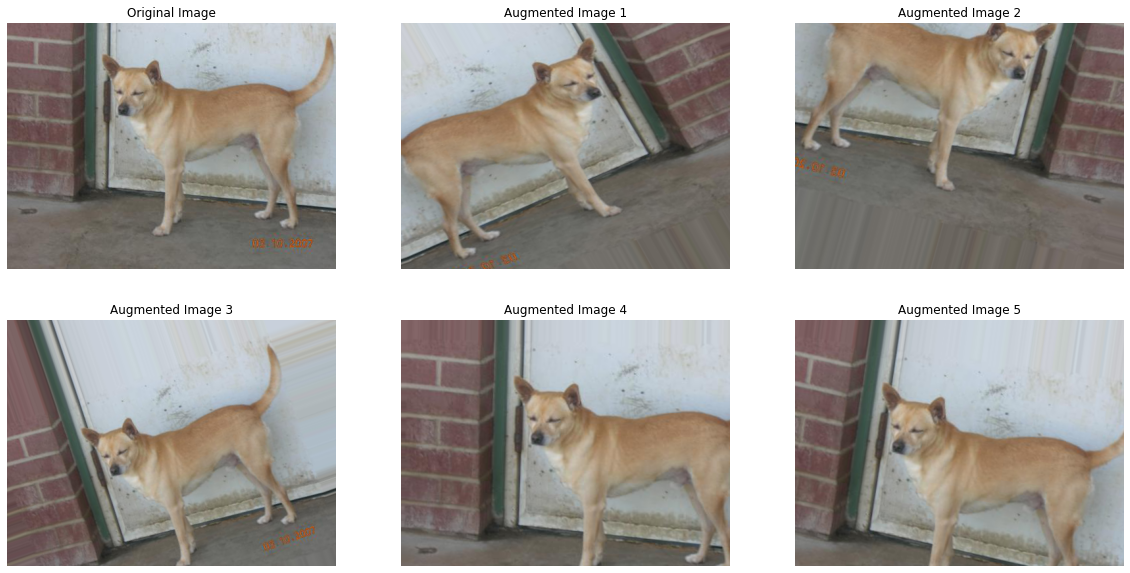

In [0]:
fig, ax = plt.subplots(2,3, figsize=(20,10))
all_images = []

_, _, dog_images = next(os.walk('ds/PetImages/Train/Dog/'))
random_img = random.sample(dog_images, 1)[0]
print(random_img)
random_img = plt.imread('ds/PetImages/Train/Dog/'+random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,) + random_img.shape)
sample_augmented_images = image_generator.flow(random_img)

for _ in range(5):
	augmented_imgs = sample_augmented_images.next()
	for img in augmented_imgs:
		all_images.append(img.astype('uint8'))

for idx, img in enumerate(all_images):
	ax[int(idx/3), idx%3].imshow(img)
	ax[int(idx/3), idx%3].axis('off')
	if idx == 0:
		ax[int(idx/3), idx%3].set_title('Original Image')
	else:
		ax[int(idx/3), idx%3].set_title('Augmented Image {}'.format(idx))


plt.show()

## Model Building

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# model=Sequential()

In [0]:
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = 20000/BATCH_SIZE
EPOCHS = 10

In [0]:
# # Add the 1st Conv layer
# model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
#         input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
#         activation = 'relu'))
# # Add the 1st Max pooling layer
# model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))

In [0]:
# # Add the 2nd Conv layer
# model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
#         input_shape=(INPUT_SIZE, INPUT_SIZE, 3),
#         activation = 'relu'))
# # Add the 2nd Max pooling layer
# model.add(MaxPooling2D(pool_size=(MAXPOOL_SIZE, MAXPOOL_SIZE)))

In [0]:
# model.add(Flatten())
# # Add the 1st Fully connect layer
# model.add(Dense(units=128, activation='relu'))

In [0]:
# # Add a drop out layer
# model.add(Dropout(0.5))

In [0]:
# # # Add the 2nd Fully connect layer
# model.add(Dense(units=1, activation='sigmoid'))

In [0]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# training_data_generator = ImageDataGenerator(rescale=1./255)
# # flow_from_directory:
#   # The batches of data are loaded into memory, as required before model training. 
#   # Thus, we can train a DNN on a huge num of images without worrying about memory issues.
# training_set = training_data_generator.flow_from_directory('ds/PetImages/Train/',
#                               target_size = (INPUT_SIZE, INPUT_SIZE),
#                               batch_size=BATCH_SIZE, class_mode='binary')

In [0]:
# model.fit_generator(training_set, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, verbose=1)

In [0]:
# # save model
# model.save('CNN_catdog.h5') 
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#   json_file.write(model_json)

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.models import model_from_json

In [0]:
model=tf.keras.models.load_model('/content/drive/My Drive/N/Projects/Image Classification/CNN_catdog.h5')

### Test set

In [0]:
# Test set
testing_data_generator = ImageDataGenerator(rescale=1./255)
test_set=testing_data_generator.flow_from_directory('ds/PetImages/Test/', 
                          target_size=(INPUT_SIZE, INPUT_SIZE),
                          batch_size=BATCH_SIZE,
                          class_mode='binary')
score = model.evaluate_generator(test_set, steps=len(test_set))
for idx, metric in enumerate(model.metrics_names):
  print("{}: {}".format(metric, score[idx]))

Found 5000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
loss: 0.3687112629413605
accuracy: 0.8325999975204468


## VGG16 Transfer Learning

In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
INPUT_SIZE = 128
vgg16 = VGG16(include_top=False, # Exclude fully conneted layers at the end of VGG16 network.
        weights='imagenet',
        input_shape=(INPUT_SIZE, INPUT_SIZE, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [0]:
for layer in vgg16.layers:
  layer.trainable = False

In [0]:
from keras.models import Model

In [0]:
# VGG16 is not a Keras Sequential model
# Therefore, adding layers as follows:
input_ = vgg16.get_input_at(0)
output_ = vgg16(input_)
last_layer = Flatten(name='flatten')(output_)
last_layer = Dense(1, activation='sigmoid')(last_layer)
model = Model(input=input_, output=last_layer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


In [0]:
BATCH_SIZE = 16
STEPS_PER_EPOCH = 200
EPOCHS = 3

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
training_data_generator = ImageDataGenerator(rescale=1./255)
testing_data_generator = ImageDataGenerator(rescale=1./255)

training_set = training_data_generator.flow_from_directory('ds/PetImages/Test/', target_size=(INPUT_SIZE, INPUT_SIZE), batch_size= BATCH_SIZE, class_mode='binary')

model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs= EPOCHS, verbose=1) # Train with GPU

Found 5000 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 9s 46ms/step - loss: 0.3609 - accuracy: 0.8331
Epoch 2/3
200/200 [==============================] - 9s 45ms/step - loss: 0.2751 - accuracy: 0.8807
Epoch 3/3
200/200 [==============================] - 9s 44ms/step - loss: 0.2399 - accuracy: 0.9003


### Test set

In [0]:
test_set=testing_data_generator.flow_from_directory('ds/PetImages/Test/', 
                          target_size=(INPUT_SIZE, INPUT_SIZE),
                          batch_size=BATCH_SIZE,
                          class_mode='binary')

Found 5000 images belonging to 2 classes.


In [0]:
score = model.evaluate_generator(test_set, len(test_set))

for idx, metric in enumerate(model.metrics_names):
  print('{}: {}'.format(metric, score[idx]))

loss: 0.21736778318881989
accuracy: 0.932200014591217


## Result Analysis



*   Strongly right predictions: The model predicted images correctly > 0.8 or < 0.2
*   Strongly wrong predictions: The model predicted images wrongly > 0.8 or < 0.2
*   Weakly wrong predictions: The model predicted images wrongly (0.4, 0.6)







In [0]:
test_set = testing_data_generator.flow_from_directory('ds/PetImages/Test', target_size=(INPUT_SIZE, INPUT_SIZE), batch_size=1, class_mode='binary')

Found 5000 images belonging to 2 classes.


In [0]:
strongly_wrong_idx = []
strongly_right_idx = []
weakly_wrong_idx = []

In [0]:
# i = 2
# img=test_set.__getitem__(i)[0]
# pred_prob=model.predict(img)[0][0]
# pred_prob

In [0]:
for i in range(test_set.__len__()): # == len(test.set)
  img = test_set.__getitem__(i)[0]
  pred_prob = model.predict(img)[0][0]
  pred_label = int(pred_prob > 0.5)
  actual_label = int(test_set.__getitem__(i)[1][0])

  if pred_label != actual_label and (pred_prob > 0.8 or pred_prob < 0.2):
    strongly_wrong_idx.append(i)
  elif pred_label != actual_label and (pred_prob > 0.4 and pred_prob < 0.6):
    weakly_wrong_idx.append(i)
  elif pred_label == actual_label and (pred_prob > 0.8 or pred_prob < 0.2):
    strongly_right_idx.append(i)

In [0]:
print("strongly_wrong_idx: {}".format(len(strongly_wrong_idx)))
print("strongly_right_idx: {}".format(len(strongly_right_idx)))
print("weakly_wrong_idx: {}".format(len(weakly_wrong_idx)))

strongly_wrong_idx: 69
strongly_right_idx: 3817
weakly_wrong_idx: 134


In [0]:
from matplotlib import pyplot as plt
import random

strongly_right_idx

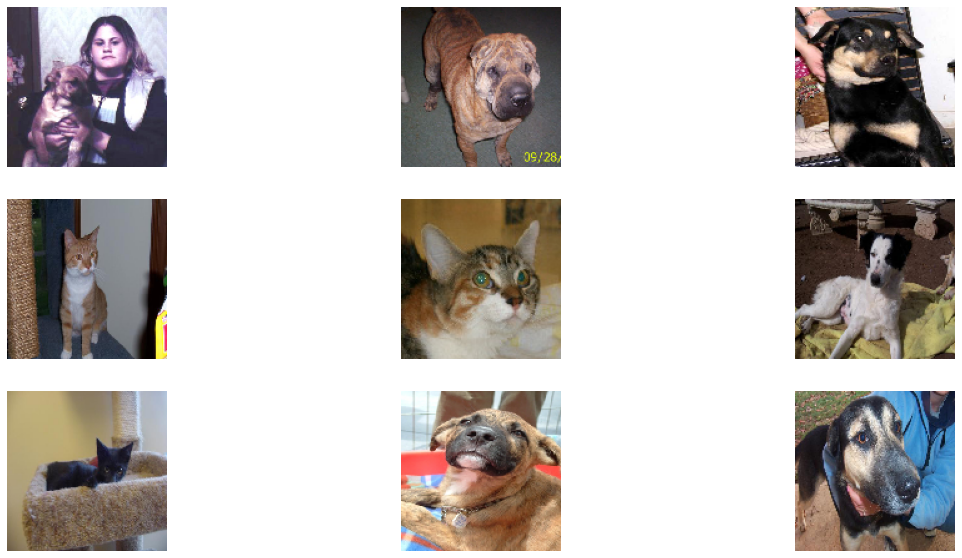

In [0]:
def plot_on_grid(test_set, idx_to_plot, img_size=INPUT_SIZE):
  fig, ax = plt.subplots(3,3, figsize=(20,10))
  for i, idx in enumerate(random.sample(idx_to_plot, 9)):
    img = test_set.__getitem__(idx)[0].reshape(img_size, img_size, 3)
    ax[int(i/3), i%3].imshow(img)
    ax[int(i/3), i%3].axis('off')
plot_on_grid(test_set, strongly_right_idx)

strongly_wrong_idx

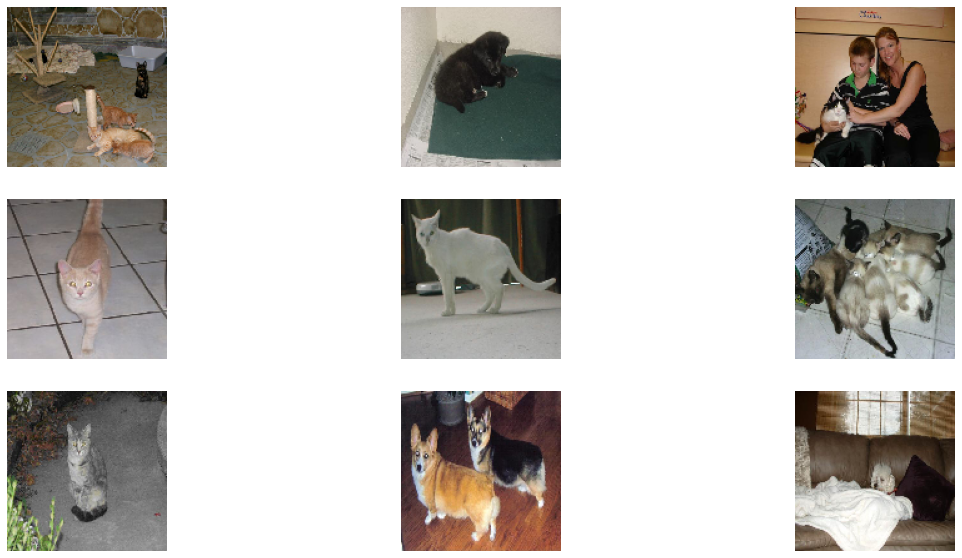

In [0]:
plot_on_grid(test_set, strongly_wrong_idx)

weakly_wrong_idx

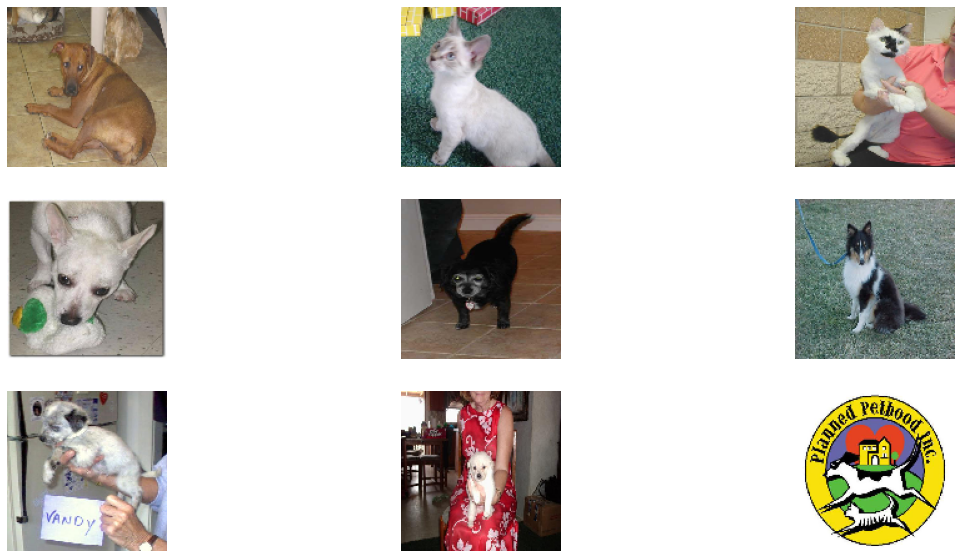

In [0]:
plot_on_grid(test_set, weakly_wrong_idx)